In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv('../datasets/1000_Companies.csv')
X = companies.iloc[:, :-1].values
Y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

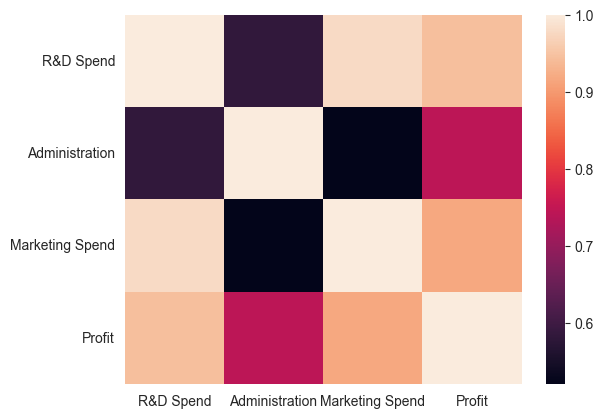

In [3]:
# data visualisation
# Building the corealation matrix

numeric_companies = companies.select_dtypes(include=[np.number])
sns.heatmap(numeric_companies.corr())

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoding only to categorical column (State)
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), [3])
    ],
    remainder='passthrough')

X = column_transformer.fit_transform(companies.iloc[:, :-1])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [7]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 89394.23575032,  88027.95819515,  94508.53314456, 175549.39580415,
        83150.97998074, 110365.61149629, 131468.83716139,  91080.37178897,
       164499.09125686,  52845.80977355,  66508.01269668, 150384.61048745,
       126593.26898994,  58880.41811173, 177293.42838506,  75039.29849957,
       118001.51199867, 164327.97934565, 174978.34867381, 182006.18783202,
       124009.8947931 ,  85265.30904176, 180871.77326235,  83737.38254064,
       104639.9667619 , 100860.1328575 ,  55972.52100476,  56567.46734371,
        68458.11806778, 211528.90031714, 120537.16479697, 111372.47323668,
       101263.40023153, 137751.9174904 ,  63521.80637147, 108499.76514776,
       185959.70818609, 171302.67161104, 174510.71530109, 117423.7029346 ,
        96497.33588965, 165207.59035386, 107363.9233561 ,  49811.45273476,
       116263.78584195,  58173.63390512, 158250.37929296,  78215.23575463,
       159564.20687059, 130917.09063893, 184767.6847563 , 174475.46214051,
        93357.21436253,  

In [8]:
regressor.coef_

array([-7.89616003e+02, -5.51149301e+02,  5.26047095e-01,  9.78530820e-01,
        9.80946128e-02])

In [9]:
regressor.intercept_

np.float64(-65676.83905543294)

In [10]:
from sklearn.metrics import r2_score

correct = r2_score(Y_test, Y_pred) * 100
correct

93.11120236268363